In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(1, '../')

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import graphsemnet.gsn_api as api
import graphsemnet.semantics as sem
import graphsemnet.xcal as xcal

In [2]:
fruit_adj = np.array(
    [
        [0, .5, .25, .125],
        [.5, 0, .25, .125],
        [.25, .25, 0., .125],
        [.125, .125, .125, 0.]
    ]
)

fruit_labels = ['apple', 'banana', 'coconut', 'durian']
fruit_graph = sem.SemanticGraph(fruit_adj, fruit_labels)

In [3]:
fruit_graph.adj

array([[ 0.   ,  0.5  ,  0.25 ,  0.125],
       [ 0.5  ,  0.   ,  0.25 ,  0.125],
       [ 0.25 ,  0.25 ,  0.   ,  0.125],
       [ 0.125,  0.125,  0.125,  0.   ]])

In [5]:
my_xcal = xcal.get_xcal(
    dip_center=.3,
    dip_width=.3,
    y_min=-.05,
    y_max=.05
)

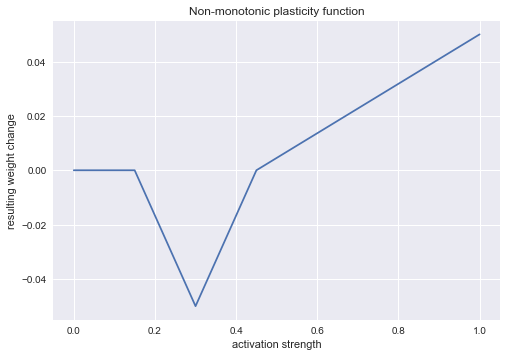

In [6]:
xs = np.linspace(0, 1., 101)
ys = my_xcal(xs)
plt.plot(xs, ys)
plt.xlabel('activation strength')
plt.ylabel('resulting weight change')
plt.title('Non-monotonic plasticity function')

In [18]:
my_xcal_general = xcal.get_xcal_general(
    dip_start=.15,
    dip_center=.2,
    dip_end=.3,
    inflection_x=.6,
    inflection_y=.035,
    y_min=-.05,
    y_max=.05
)

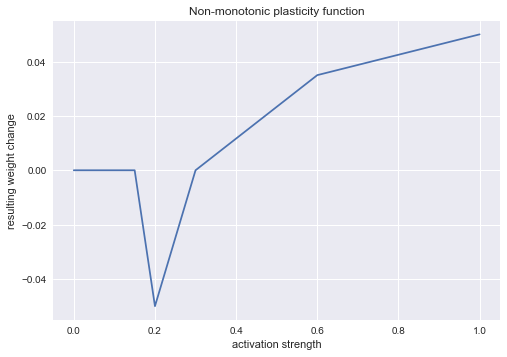

In [19]:
xs = np.linspace(0, 1., 101)
ys = my_xcal_general(xs)
plt.plot(xs, ys)
plt.xlabel('activation strength')
plt.ylabel('resulting weight change')
plt.title('Non-monotonic plasticity function')

In [56]:
op_depth = api.GraphOperator(fruit_graph, api.operate_recur, my_xcal, .8)

In [57]:
new_graph = op_depth.activate(np.array([1,0,0,0]))

In [58]:
new_graph.adj

array([[ 0.        ,  0.46666667,  0.21666667,  0.125     ],
       [ 0.46666667,  0.        ,  0.21666667,  0.125     ],
       [ 0.21666667,  0.21666667,  0.        ,  0.125     ],
       [ 0.125     ,  0.125     ,  0.125     ,  0.        ]])

In [59]:
op_breadth = api.GraphOperator(fruit_graph, api.operate_depth, my_xcal, .8)

In [60]:
new_graph_b = op_breadth.activate(np.array([1,0,0,0]))

In [61]:
new_graph_b.adj

array([[ 0.   ,  0.55 ,  0.3  ,  0.175],
       [ 0.49 ,  0.   ,  0.24 ,  0.115],
       [ 0.25 ,  0.25 ,  0.   ,  0.125],
       [ 0.125,  0.125,  0.125,  0.   ]])